<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="../figs/uoc_masterbrand_3linies_positiu.png", align="left">
    </div>
    <div style="float: right; width: 50%;">
        <p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
        <p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
        <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
    </div>
</div>
<div style="width:100%;">&nbsp;</div>

# Agrupamiento jerárquico con _shopping-data_

El problema que vamos a resolver en esta sección es el de segmentar a los clientes en diferentes grupos según sus tendencias de compra, empleando el dataset `shopping-data`.

In [5]:
# Importamos las librerías que nos harán falta
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [7]:
customer_data = pd.read_csv('../data/shopping-data.csv')

A continuación, vamos a explorar un poco el dataset.

In [8]:
customer_data.shape

(200, 5)

In [9]:
customer_data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Vemos que nuestro dataset tiene 5 columnas: 
- el código de cliente
- el género
- la edad
- los ingresos anuales 
- los gastos de los clientes 

Veamos los resultados en el espacio de características bidimensional. Para ello tenemos que «eliminar» de alguna manera tres columnas. 

En este caso es interesante analizar las dos últimas (los ingresos anuales de las personas y lo que se gastan) para ver si encontramos alguna relación interesante entre ellas. 

Por lo tanto, filtramos con la función `iloc` (mirad esta función en [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)). 

In [10]:
data = customer_data.iloc[:, 3:5].values

Y creamos el dendograma como lo hemos hecho anteriormente. 

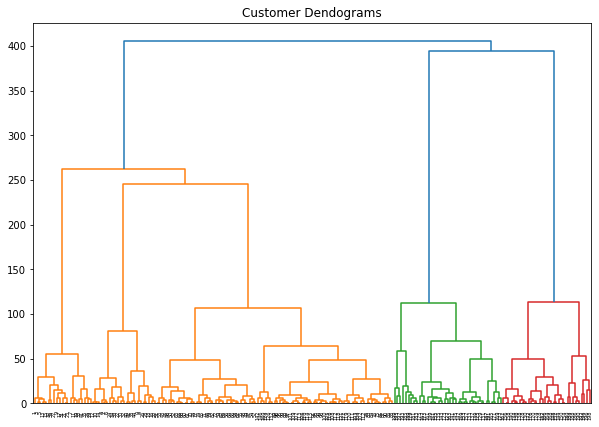

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

__Nota__: Aquí hemos utilizado el método `linkage`. Este método minimiza las distancias como parámetros, pero podríamos haberlo hecho con otro método. Es interesante mirar cómo difiere el resultado al hacerlo de diferentes maneras. 

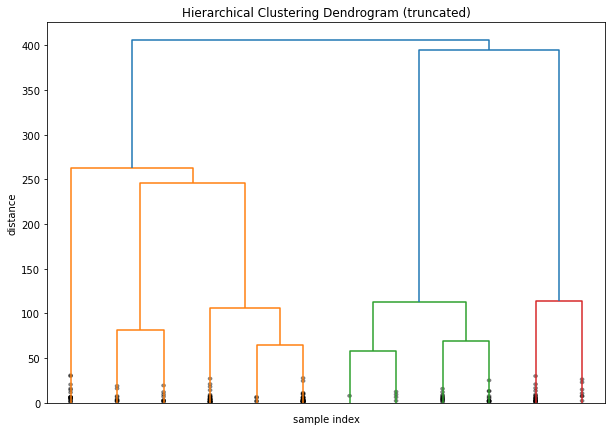

In [12]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(data, 'ward')

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

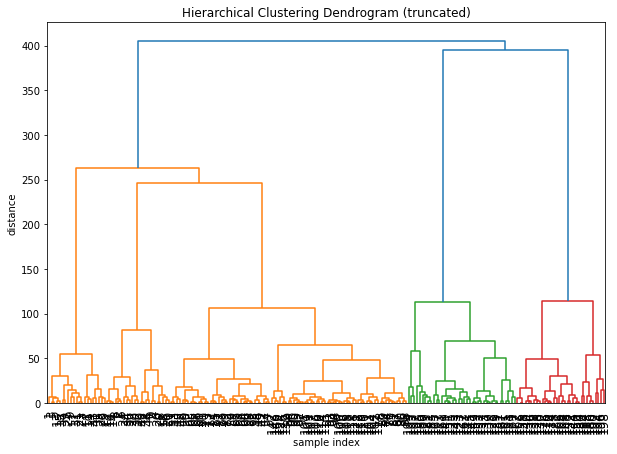

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='mlab',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,  # to get a distribution impression in truncated branches
)
plt.show()

Una vez hemos visto los diferentes dendogramas, vamos a ver ahora los clústeres que tenemos del dendograma.

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

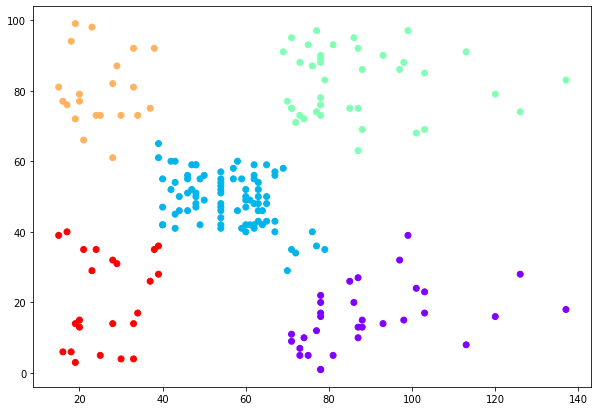

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

En el apartado anterior, lo que hemos hecho es establecer un número de clústeres que nosotros hemos considerado coherente. ¿Y por qué 5? Porque en el dendograma anterior hemos visto que con 5 ya tenemos un número de clústeres que tienen bastantes puntos, por lo que en principio parece un buen candidato.

Otra cosa importante a tener en cuenta es jugar con los parámetros. 

Por ejemplo:

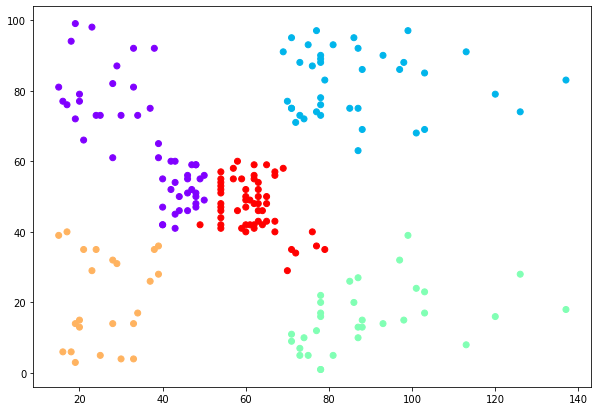

In [16]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity='manhattan', linkage='complete')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Aquí, por ejemplo, hemos usado la distancia Manhattan en vez de la distancia euclídea. También podemos hacerlo con la distancia coseno.

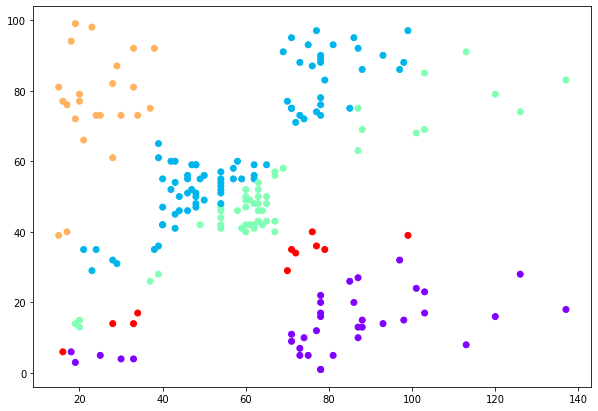

In [17]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity='cosine', linkage='complete')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Como podemos ver, los clústeres han cambiado. 

Por lo tanto, es importante la métrica que utilicemos para «linkar» los clústeres, así como el criterio usado para su linkage (agrupación).